In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns

# Analyse d'une couche du parcellaire : le plan Destailleurs

In [3]:
path = '../vecteurs/parcellaire_18e_qualifie'
os.chdir(path)

In [4]:
axes_nf = gpd.read_file("Axes_18e.shp")
distance_nf = gpd.read_file("Distance_18e.shp")
lineaire_nf = gpd.read_file("Façades_18e.shp")
parcelles_nf = gpd.read_file("Parcelles_18e.shp")

In [5]:
axes = axes_nf[(axes_nf['id_init'].str.contains('TP')==False) & (axes_nf['id_init'].str.contains('NT')==False) & ~(axes_nf['etiquette'].isnull())]
distance = distance_nf[(distance_nf['id'].str.contains('TP')==False) & (distance_nf['id'].str.contains('NT')==False)]
lineaire = lineaire_nf[(lineaire_nf['id'].str.contains('TP')==False) & (lineaire_nf['id'].str.contains('NT')==False) & ~(lineaire_nf['etiquette'].isnull())]
parcelles = parcelles_nf[(parcelles_nf['id'].str.contains('TP')==False) & (parcelles_nf['id'].str.contains('NT')==False)]

In [6]:
def stats_ilot(df,elt):
    size = len(df['id_ilot'].unique())+1
    plt.figure(figsize=(15,5*size))
    bins = np.linspace(0,max(df[elt]),50)
    i=1
    plt.subplot(size,1,i)
    sns.boxplot(data=df, x="id_ilot", y=elt)
    i=2
    for ilot in np.sort(df['id_ilot'].unique()):
        plt.subplot(size,1,i)
        donnees = df[df['id_ilot']==ilot][elt]
        sns.histplot(donnees,bins=bins,stat="probability")
        #ax.set_xlim(0, max(axes['surface_pa']))
        plt.title('ilot '+str(ilot))
        i+=1
    plt.show()

In [7]:
def stats_rue(df,elt):
    size = len(df['etiquette'].unique())+1
    plt.figure(figsize=(15,5*size))
    #bins = np.linspace(0,max(df[elt]),50)
    i=1
    plt.subplot(size,1,i)
    sns.boxplot(data=df, x="etiquette", y=elt)
    i=2
    for rue in np.sort(df['etiquette'].unique()):
        plt.subplot(size,1,i)
        donnees = df[df['etiquette']==rue][elt]
        #sns.histplot(donnees,bins=bins,stat="probability")
        sns.histplot(donnees)
        #ax.set_xlim(0, max(axes['surface_pa']))
        plt.title(rue)
        i+=1
    plt.show()

# Caractéristiques des parcelles

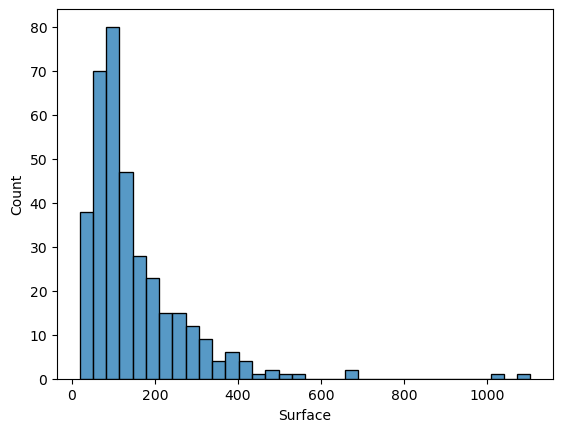

In [223]:
plt.figure()
surface = list(parcelles['surface_pa'])
sns.histplot(surface)
plt.xlabel("Surface")
plt.show()

On observe que les parcelles sont réparties de façon très inégale suivant ce qui ressemble à une loi exponentielle. On peut à nouveau faire une catégorisation de Jenks sur le parcellaire, avec quatre catégories

In [30]:
parcelles.loc[(parcelles['surface_pa']>=18) & (parcelles['surface_pa']<147),'classe'] = 'classe 1'
parcelles.loc[(parcelles['surface_pa']>=147) & (parcelles['surface_pa']<298),'classe'] = 'classe 2'
parcelles.loc[(parcelles['surface_pa']>=298) & (parcelles['surface_pa']<668),'classe'] = 'classe 3'
parcelles.loc[(parcelles['surface_pa']>=668) & (parcelles['surface_pa']<1104),'classe'] = 'classe 4'

C:\Users\utilisateur\anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


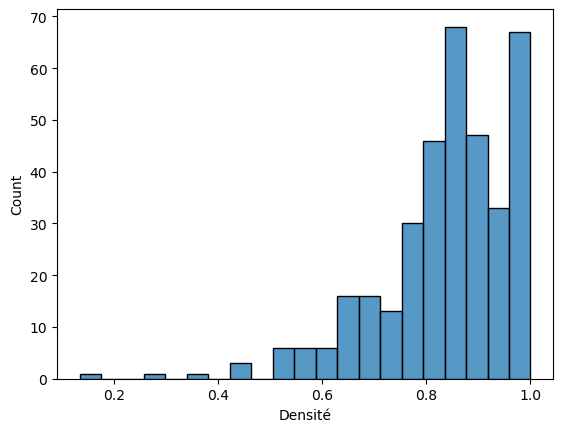

In [224]:
plt.figure()
densite = list(parcelles['densite'])
sns.histplot(densite)
plt.xlabel("Densité")
plt.show()

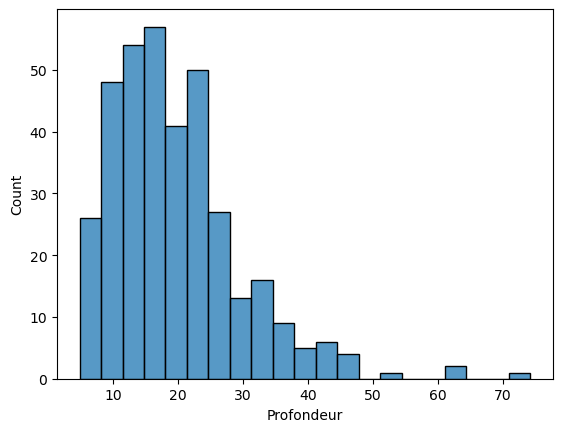

In [225]:
plt.figure()
profondeur = list(parcelles['profondeur'])
sns.histplot(profondeur)
plt.xlabel("Profondeur")
plt.show()

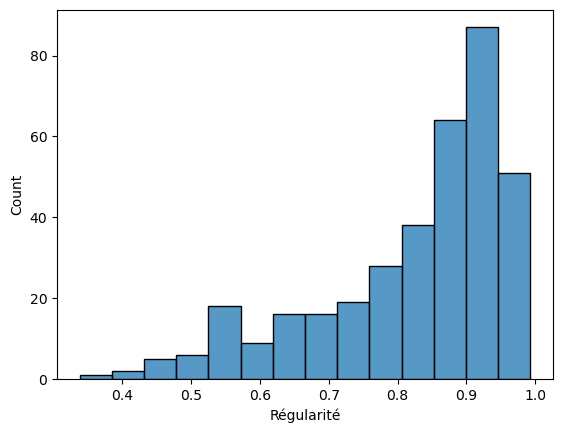

In [226]:
plt.figure()
rectangularite = list(parcelles['rectangula'])
sns.histplot(rectangularite)
plt.xlabel("Régularité")
plt.show()

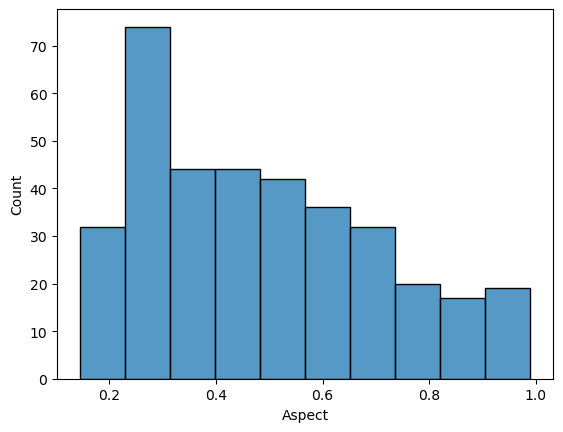

In [227]:
plt.figure()
elongation = list(parcelles['ratio'])
sns.histplot(elongation)
plt.xlabel("Aspect")
plt.show()

On a donc un parcellaire majoritairement de faible surface et densément bâti, de profondeur faible principalement. La plupart des parcelles sont d'aspect plutôt rectangulaire et allongées. Au niveau des corrélations entre variables descriptives

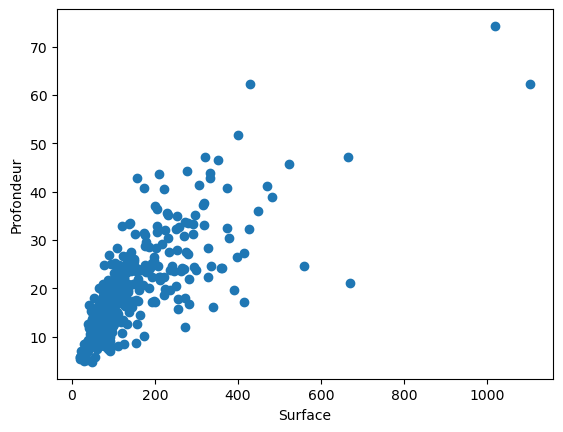

In [228]:
fig, ax = plt.subplots()
plt.scatter(surface, profondeur)
plt.xlabel("Surface")
plt.ylabel("Profondeur")
plt.show()

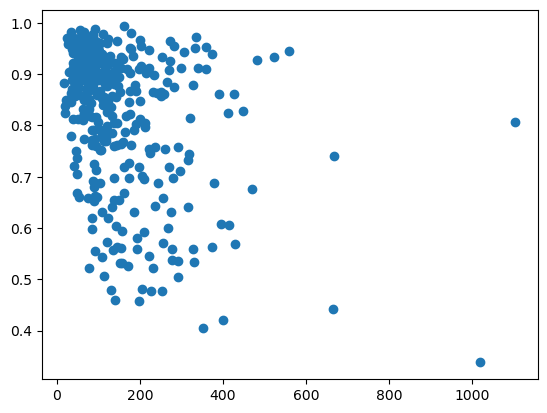

In [106]:
fig, ax = plt.subplots()
plt.scatter(surface, rectangularite)
plt.show()

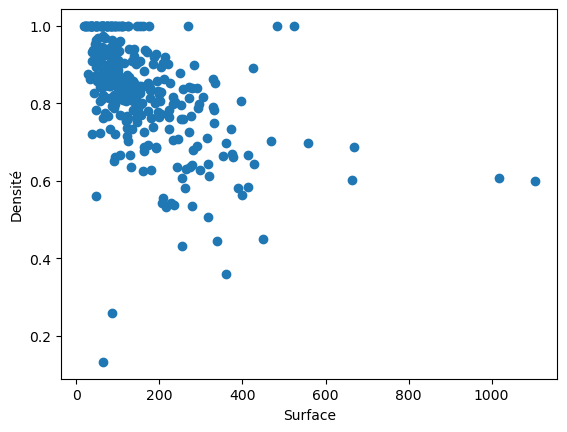

In [232]:
fig, ax = plt.subplots()
plt.scatter(surface, densite)
plt.xlabel("Surface")
plt.ylabel("Densité")
plt.show()

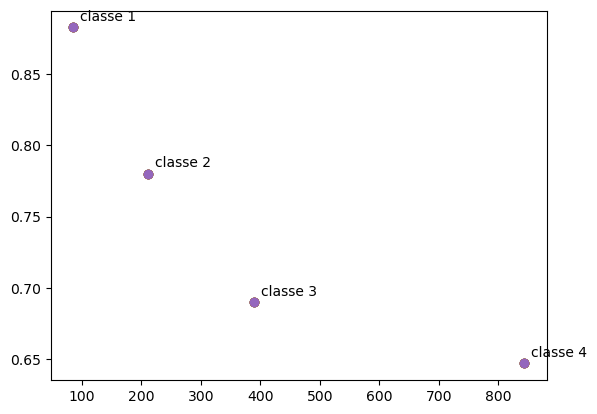

In [400]:
fig, ax = plt.subplots()
densite_moy = parcelles.groupby('classe')['densite'].mean()
surfaces_moy = parcelles.groupby('classe')['surface_pa'].mean()
densite_liste = list(densite_moy)
moyenne_liste = list(surfaces_moy)
ax.scatter(moyenne_liste,densite_liste)

for i, txt in enumerate(parcelles['classe'].unique()[0:4]):
    ax.annotate(txt, (moyenne_liste[i], densite_liste[i]), xytext=(5,5), textcoords='offset points')
    plt.scatter(moyenne_liste,densite_liste)

plt.show()

Sans trop de surprises, on observe que la profondeur est une fonction croissante de la surface avec une corrélation pas trop mauvaise : les parcelles les plus grandes se situent principalement en coeur d'îlot ou s'étendent loin vers le centre, induisant éventuellement des irrégularités dont témoigne la décroissance de la régularité des parcelles avec l'augmentation de leur surface. Il semble qu'il n'y ait toutefois pas de corrélation évidente entre l'aspect plus ou moins carré de l'emprise et la surface des parcelles, et on peut donc à priori avoir des parcelles de grande surface carrées. La densité apparaît elle aussi logiquement être une fonction décroissante de la surface, avec un coefficient de corrélation aux alentours de 0.5. En classant les données avec une méthode Jenks il apparaît que les parcelles les plus denses sont réparties différemment selon les faces d'îlot, en général les parcelles d'angle semblent être les plus denses.


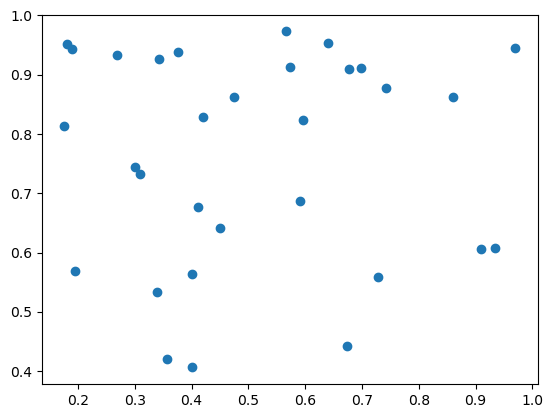

In [122]:
fig, ax = plt.subplots()
rectangularite_c = list(parcelles[parcelles['classe']=='classe 3']['rectangula'])
elongation_c = list(parcelles[parcelles['classe']=='classe 3']['ratio'])
plt.scatter(elongation_c,rectangularite_c)
plt.show()

On remarque tout de même qu'à mesure que la surface des classes augmente on retrouve de moins en moins de parcelles dont la surface orientée minimale est carrée.

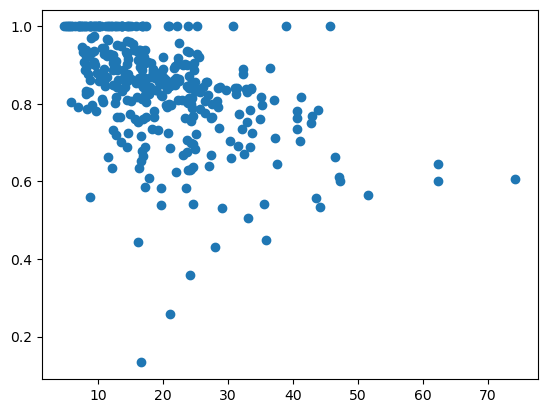

In [437]:
fig, ax = plt.subplots()
profondeur = list(parcelles['profondeur'])
densite = list(parcelles['densite'])
plt.scatter(profondeur,densite)
plt.show()

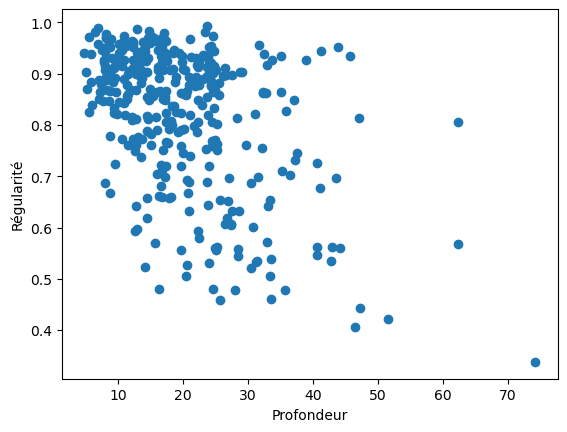

In [233]:
fig, ax = plt.subplots()
profondeur = list(parcelles['profondeur'])
rectangularite = list(parcelles['rectangula'])
plt.scatter(profondeur,rectangularite)
plt.xlabel("Profondeur")
plt.ylabel("Régularité")
plt.show()

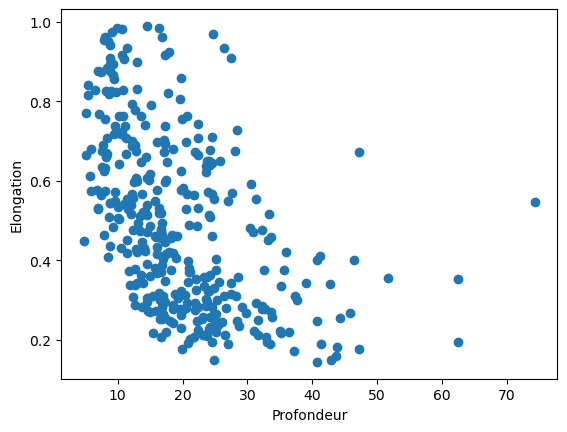

In [234]:
fig, ax = plt.subplots()
profondeur = list(parcelles['profondeur'])
elongation = list(parcelles['ratio'])
plt.scatter(profondeur,elongation)
plt.xlabel("Profondeur")
plt.ylabel("Elongation")
plt.show()

La profondeur semble un critère pertinent d'analyse, celle-ci étant fortement corrélée à la densité de la parcelle, la rectangularité et l'élongation. L'élongation augmente bien avec la profondeur des parcelles tout en atteignant une valeur maximale de 0.85 (parcelle place Maubert)

In [123]:
parcelles['angles'] = pd.to_numeric(parcelles['angles'])
parcelles.corr()

C:\Users\utilisateur\anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_110900\1778693481.py:2: FutureWarning: The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  parcelles.corr()


,id_ilot,surface_pa,densite,surface_ja,nb_batimen,nb_cours,nb_jardins,issues,angles,rectangula,orientatio,ratio,profondeur
id_ilot,1.000000,0.034600,-0.132065,0.040651,0.149186,0.194429,0.059670,-0.057022,-0.155294,-0.216152,-0.099348,-0.202655,0.172946
surface_pa,0.034600,1.000000,-0.496293,0.456513,0.379840,0.526523,0.365517,0.175017,-0.021161,-0.344446,0.062770,-0.018270,0.757139
densite,-0.132065,-0.496293,1.000000,-0.295185,-0.410796,-0.487367,-0.283502,0.006369,0.264107,0.286800,-0.139349,0.107272,-0.480742
surface_ja,0.040651,0.456513,-0.295185,1.000000,0.124385,0.144765,0.772500,0.045250,0.032090,-0.152878,0.045918,-0.000368,0.334823
nb_batimen,0.149186,0.379840,-0.410796,0.124385,1.000000,0.464041,0.128774,0.058804,-0.117254,-0.493675,0.036553,-0.086112,0.454750
nb_cours,0.194429,0.526523,-0.487367,0.144765,0.464041,1.000000,0.101687,0.055319,-0.241911,-0.359623,0.082279,-0.145525,0.572737
nb_jardins,0.059670,0.365517,-0.283502,0.772500,0.128774,0.101687,1.000000,0.153937,-0.015495,-0.191792,0.039598,-0.045674,0.329667
issues,-0.057022,0.175017,0.006369,0.045250,0.058804,0.055319,0.153937,1.000000,-0.100660,-0.208867,-0.099196,-0.017751,0.197228
angles,-0.155294,-0.021161,0.264107,0.032090,-0.117254,-0.241911,-0.015495,-0.100660,1.000000,0.122181,0.005252,0.203200,-0.122442
rectangula,-0.216152,-0.344446,0.286800,-0.152878,-0.493675,-0.359623,-0.191792,-0.208867,0.122181,1.000000,-0.023023,-0.034028,-0.473730


# Etude par îlot

In [238]:
length = parcelles.shape[0]

## Caractéristiques des îlots

#### Nombre de parcelles

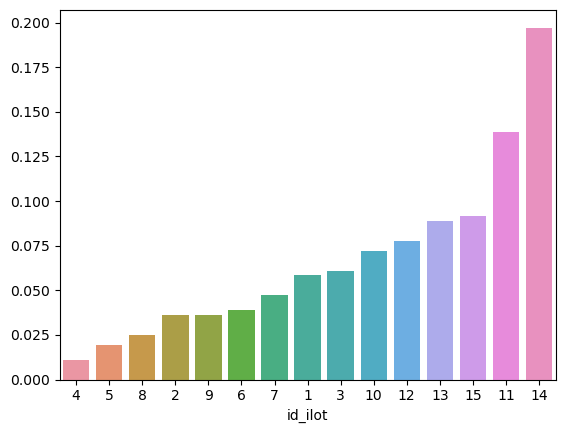

In [239]:
plt.figure()
liste_ns = parcelles.groupby(['id_ilot'])['id'].count()
liste = parcelles.groupby(['id_ilot'])['id'].count().sort_values()
ilots = list(liste_ns.keys())
rapport = list(liste/length)
sns.barplot(x=liste.keys(),y=rapport,order=liste.keys())

plt.show()

Critère d'étude pas pertinent pcq de toutes façons on ne sait pas cb de parcelles il y a dans l'îlot 2

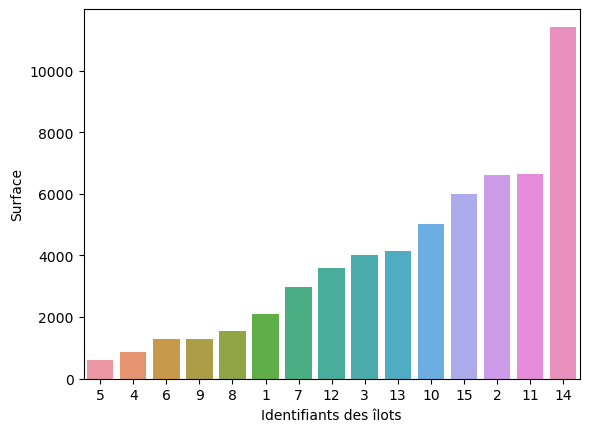

In [240]:
plt.figure()
surfaces_ilot_ns = parcelles.groupby(['id_ilot'])['surface_pa'].sum()
surfaces_ilot = parcelles_nf.groupby(['id_ilot'])['surface_pa'].sum().sort_values()
sns.barplot(x=surfaces_ilot.keys(),y=surfaces_ilot, order=surfaces_ilot.keys())
plt.xlabel("Identifiants des îlots")
plt.ylabel("Surface")
plt.show()

On a presque un fonctionnement par paliers des surfaces d'îlot, qui fait émerger quatre classes de surface que l'on peut projeter sur la carte (avec une classification de type Jenks). Les îlots les plus petits se concentrent près des berges de la Seine et près de la place Maubert. On voit donc une fragmentation du bâti près de la place, dans laquelle se jette un certain nombre de voies, tandis que le long de la rue Galande les voies se contentent de mettre en communication celle-ci et la rue de la bûcherie. A étudier : la facilité d'accéder à la place Maubert depuis les îlots

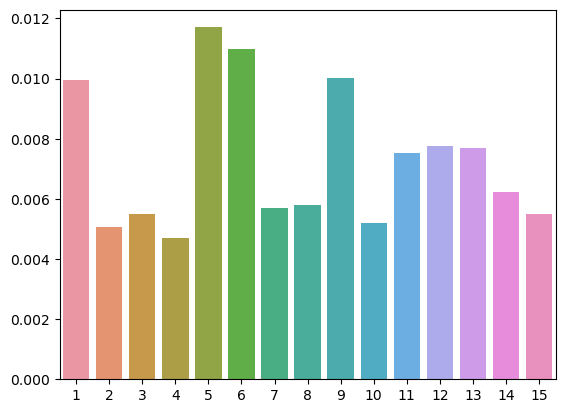

In [241]:
plt.figure()
densite = list(liste_ns/surfaces_ilot_ns)
sns.barplot(x=ilots, y=densite)
plt.show()

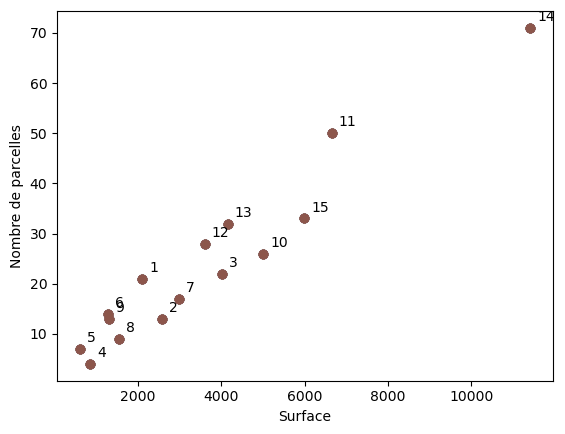

In [242]:
fig, ax = plt.subplots()
compte_parcelles = list(liste_ns)
surfaces_liste = list(surfaces_ilot_ns)
ax.scatter(surfaces_liste, compte_parcelles)

for i, txt in enumerate(ilots):
    ax.annotate(txt, (surfaces_liste[i], compte_parcelles[i]), xytext=(5,5), textcoords='offset points')
    plt.scatter(surfaces_liste, compte_parcelles)

plt.xlabel("Surface")
plt.ylabel("Nombre de parcelles")
plt.show()

On observe une relation linéaire entre le nombre de parcelles dans un îlot et sa surface (les parcelles non traîtées ont été exclues du calcul). Il n'y a toutefois pas une mais deux relations linéaires, une partie des îlots ayant une densité parcellaire inférieure à l'autre. Spatialement, les îlots concernés sont ceux au Nord de la rue Galande ainsi que l'îlot 15 entre la rue des noyers et la rue du plâtre

#### Surface des parcelles

In [244]:
il = []
cl = []
vl = []
type_parcelles = {}

for ilot in list(surfaces_ilot.keys()):
    for classe in list(parcelles['classe'].unique()):
        il.append(ilot)
        cl.append(classe)
        vl.append(parcelles[(parcelles['id_ilot']==ilot) & (parcelles['classe']==classe)]['classe'].count()/liste[ilot])
        
type_parcelles['il']=il
type_parcelles['cl']=cl
type_parcelles['vl']=vl

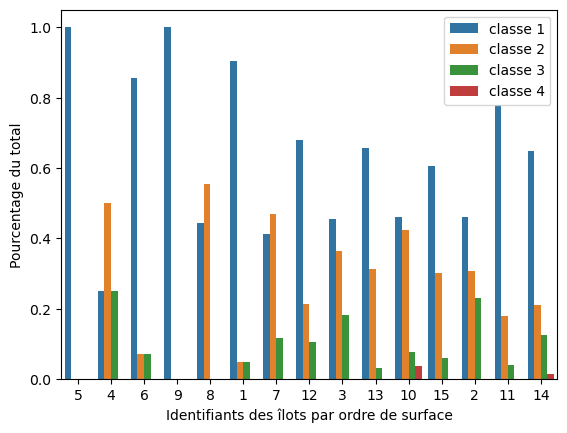

In [245]:
plt.figure()
sns.barplot(data=type_parcelles,x='il',y='vl',hue='cl',order=list(surfaces_ilot.keys()))
plt.xlabel("Identifiants des îlots par ordre de surface")
plt.ylabel("Pourcentage du total")
plt.show()

On remarque que dans le cas général le nombre de parcelles de très grande surface est faible, et qu'on retrouve les deux groupes que l'on avait au niveau de la densité: les îlots plus isolés des grands axes viaires présentent d'importantes proportions de parcelles de taille moyenne par rapport au total des parcelles

In [131]:
#il = []
#cl = []
#vl = []
type_parcelles = {}

for ilot in list(surfaces_ilot.keys()):
    rapport = {}
    for classe in list(parcelles['classe'].unique()):
        #il.append(ilot)
        #cl.append(classe)
        #vl.append(parcelles[(parcelles['id_ilot']==ilot) & (parcelles['classe']==classe)]['classe'].count()/liste[ilot])
        rapport[classe] = parcelles[(parcelles['id_ilot']==ilot) & (parcelles['classe']==classe)]['classe'].count()/liste[ilot]
    type_parcelles[ilot] = rapport
        
#type_parcelles['il']=il
#type_parcelles['cl']=cl
#type_parcelles['vl']=vl

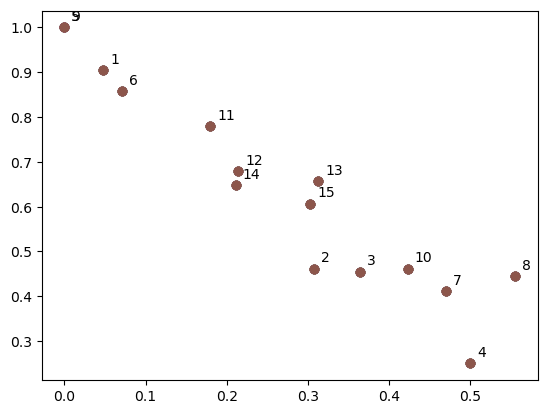

In [132]:
fig, ax = plt.subplots()
classe_1 = [type_parcelles[i]['classe 1'] for i in type_parcelles.keys()]
classe_2 = [type_parcelles[i]['classe 2'] for i in type_parcelles.keys()]
ax.scatter(classe_2, classe_1)

for i, txt in enumerate(type_parcelles.keys()):
    ax.annotate(txt, (classe_2[i], classe_1[i]), xytext=(5,5), textcoords='offset points')
    plt.scatter(classe_2, classe_1)

plt.show()

Cette courbe confirme la tendance qu'on avait pu noter dans le graphe précédent, avec plusieurs groupes plus nettement identifiables en matière de proportions de parcelles petites et moyennes. Ces tendances ont un impact sur la valeur moyenne des surfaces des parcelles.

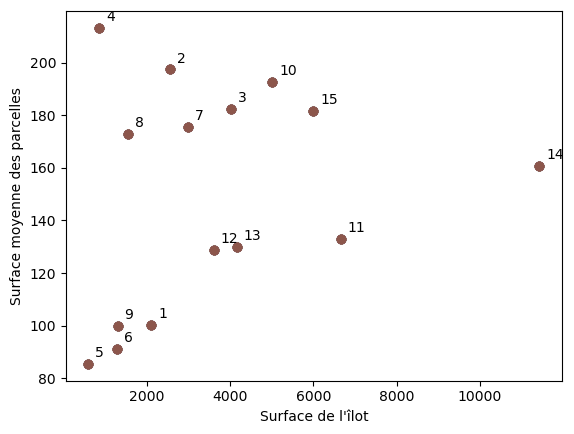

In [246]:
fig, ax = plt.subplots()
surfaces_ilot = parcelles.groupby(['id_ilot'])['surface_pa'].sum()
surfaces_moy = parcelles.groupby('id_ilot')['surface_pa'].mean()
surfaces_liste = list(surfaces_ilot)
moyenne_liste = list(surfaces_moy)
ax.scatter(surfaces_liste, moyenne_liste)

for i, txt in enumerate(ilots):
    ax.annotate(txt, (surfaces_liste[i], moyenne_liste[i]), xytext=(5,5), textcoords='offset points')
    plt.scatter(surfaces_liste, moyenne_liste)

plt.xlabel("Surface de l'îlot")
plt.ylabel("Surface moyenne des parcelles")
plt.show()

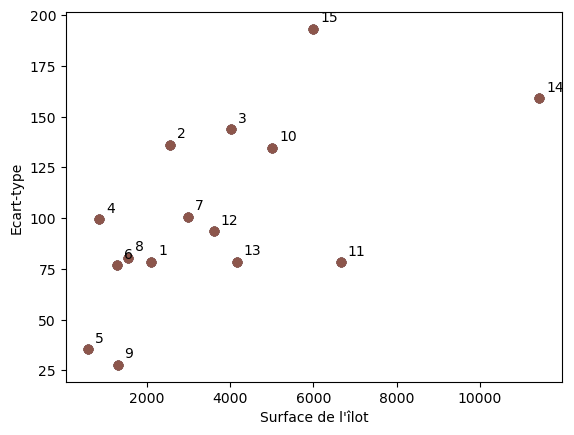

In [247]:
fig, ax = plt.subplots()
surfaces_ilot = parcelles.groupby(['id_ilot'])['surface_pa'].sum()
surfaces_std = parcelles.groupby('id_ilot')['surface_pa'].std()
ecart_type_liste = list(surfaces_std)
surfaces_liste = list(surfaces_ilot)
ax.scatter(surfaces_liste, ecart_type_liste)

for i, txt in enumerate(ilots):
    ax.annotate(txt, (surfaces_liste[i], ecart_type_liste[i]), xytext=(5,5), textcoords='offset points')
    plt.scatter(surfaces_liste, ecart_type_liste)

plt.xlabel("Surface de l'îlot")
plt.ylabel("Ecart-type")
plt.show()

écarts :  [78.53588710231533, 136.03762532688123, 143.6487374454245, 99.35370043267974, 35.39816833504511, 76.64503121881397, 100.57101859678855, 80.52276297489493, 27.67867691808801, 134.53767069198926, 78.21203970318281, 93.41393638644246, 78.40615425940103, 159.0661974642862, 193.14857929488528]
moyenne :  [100.41104761904762, 197.4240769230769, 182.46195454545455, 213.2175, 85.42214285714286, 91.05792857142858, 175.54829411764706, 172.8428888888889, 99.71653846153846, 192.7121153846154, 133.04528, 128.77610714285714, 129.98615625, 160.8900985915493, 181.50115151515152]


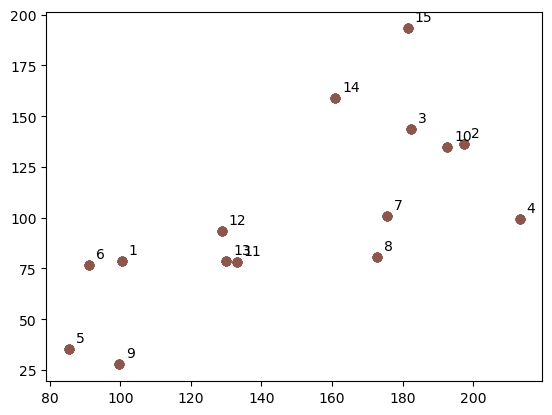

In [251]:
fig, ax = plt.subplots()
ax.scatter(moyenne_liste, ecart_type_liste)

for i, txt in enumerate(ilots):
    ax.annotate(txt, (moyenne_liste[i], ecart_type_liste[i]), xytext=(5,5), textcoords='offset points')
    plt.scatter(moyenne_liste, ecart_type_liste)

print('écarts : ', ecart_type_liste)
print('moyenne : ', moyenne_liste)
plt.show()

On retrouve cette même distinction dans le rapport entre surface moyenne des parcelles et surface de l'îlot : la surface moyenne des parcelles au sein îlots de plus faible densité est plus élevée que dans les îlots de plus forte densité parcellaire. Plusieurs groupes sont aussi distinguables pour l'analyse des écarts-types : les parcelles aux valeurs moyennes élevées ont souvent des écarts de surface importants mais la composition des groupes s'y retrouve toutefois modifiée.

#### Densité du bâti

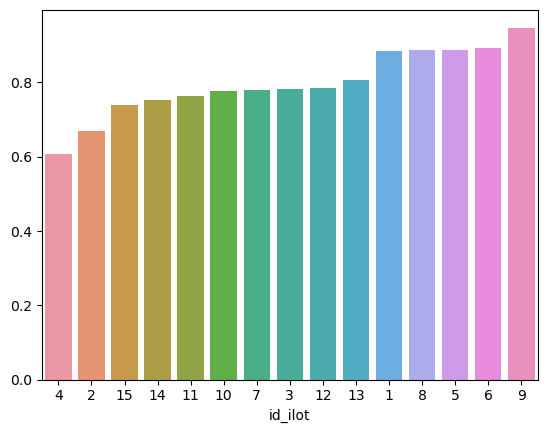

In [262]:
plt.figure()
surfaces_ilot_ns = parcelles_nf.groupby(['id_ilot'])['surface_pa'].sum()
parcelles_nf['surface_batie'] = parcelles_nf['densite']*parcelles_nf['surface_pa']
densite_ilot_ns = parcelles_nf.groupby(['id_ilot'])['surface_batie'].sum()/surfaces_ilot_ns
densite_ilot = densite_ilot_ns.sort_values()
sns.barplot(x=densite_ilot.keys(),y=densite_ilot, order=densite_ilot.keys())
plt.show()

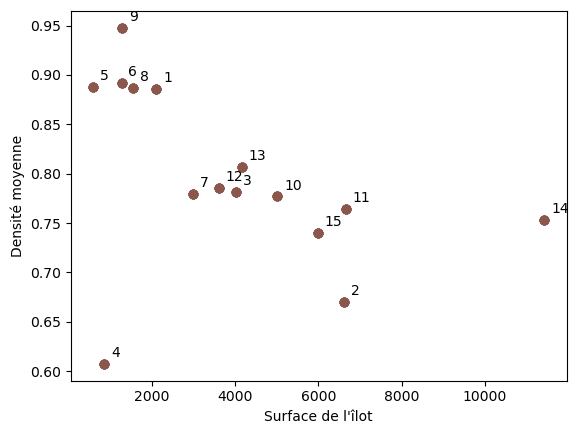

In [263]:
fig, ax = plt.subplots()
#densite_ilot_ns = parcelles_nf.groupby('id_ilot')['densite'].mean()
densite = list(densite_ilot_ns)
surfaces_liste = list(surfaces_ilot_ns)
ax.scatter(surfaces_liste, densite)

for i, txt in enumerate(ilots):
    ax.annotate(txt, (surfaces_liste[i], densite[i]), xytext=(5,5), textcoords='offset points')
    plt.scatter(surfaces_liste, densite)

plt.xlabel("Surface de l'îlot")
plt.ylabel("Densité moyenne")
plt.show()

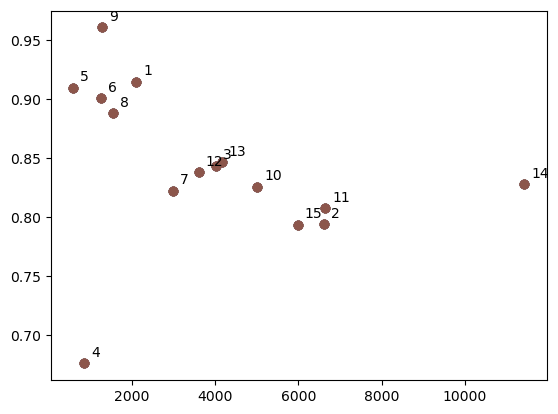

In [254]:
fig, ax = plt.subplots()
densite_ilot_ns = parcelles_nf.groupby('id_ilot')['densite'].mean()
densite = list(densite_ilot_ns)
surfaces_liste = list(surfaces_ilot_ns)
ax.scatter(surfaces_liste, densite)

for i, txt in enumerate(ilots):
    ax.annotate(txt, (surfaces_liste[i], densite[i]), xytext=(5,5), textcoords='offset points')
    plt.scatter(surfaces_liste, densite)


plt.show()

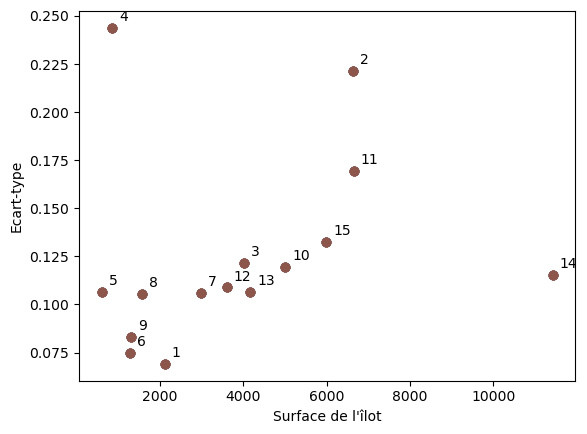

In [260]:
fig, ax = plt.subplots()
de_std = parcelles.groupby('id_ilot')['densite'].std()
densite_ecarts = list(de_std)
surfaces_liste = list(surfaces_ilot_ns)
ax.scatter(surfaces_liste, densite_ecarts)

for i, txt in enumerate(ilots):
    ax.annotate(txt, (surfaces_liste[i], densite_ecarts[i]), xytext=(5,5), textcoords='offset points')
    plt.scatter(surfaces_liste, densite_ecarts)

plt.xlabel("Surface de l'îlot")
plt.ylabel("Ecart-type")
plt.show()

écarts :  [0.0690880390723108, 0.22140701005741464, 0.12139574295224033, 0.2437558546305435, 0.10650150904363483, 0.07473381334538508, 0.10600502901499813, 0.10545193744598112, 0.08300440210754348, 0.11958194486820134, 0.16963724080928616, 0.10883910629089646, 0.10658961378168623, 0.11536917037422527, 0.1327015191390746]
moyenne :  [0.9145714285714286, 0.7940714285714287, 0.8434545454545455, 0.67625, 0.9092857142857144, 0.9002857142857142, 0.8222352941176471, 0.8878888888888888, 0.9603076923076923, 0.8258076923076924, 0.80732, 0.8378928571428571, 0.84659375, 0.8276901408450704, 0.7934545454545455]


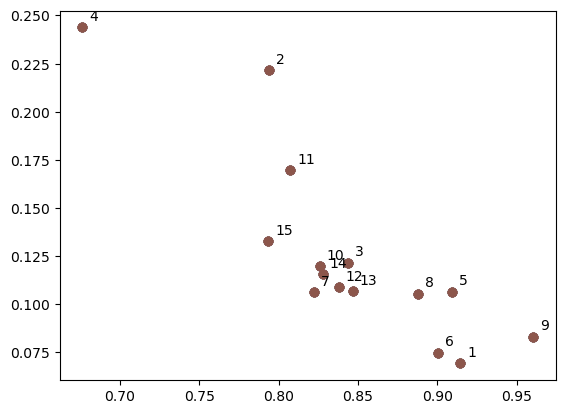

In [256]:
fig, ax = plt.subplots()
ax.scatter(densite, densite_ecarts)

for i, txt in enumerate(ilots):
    ax.annotate(txt, (densite[i], densite_ecarts[i]), xytext=(5,5), textcoords='offset points')
    plt.scatter(densite, densite_ecarts)

print('écarts : ', densite_ecarts)
print('moyenne : ', densite)
plt.show()

On remarque cette fois que la densité au sein des îlots se classe surtout selon la surface de ceux-ci, à quelques exceptions près : la première classe d'îlots définie plus haut regroupe un parcellaire plutôt dense, à 90% d'occupation du sol, tandis que la plupart des autres de surface plus élevées ont une densité plus faible, qui tend à décroître lentement avec la surface. On note quelques exceptions : l'îlot 9 à la densité importante, et les îlots 2 et 4 à la densité plus faible, l'un à cause de la présence de l'enclos Saint-Julien-le-Pauvre, l'autre parce qu'une des parcelles est occupée par un grand jardin. En matière d'écart-type, celui-ci reste généralement assez faible, à part pour les îlots 2, 4 et 11 qui présentent des écarts entre parcelles hors de la norme.

#### Profondeur des parcelles

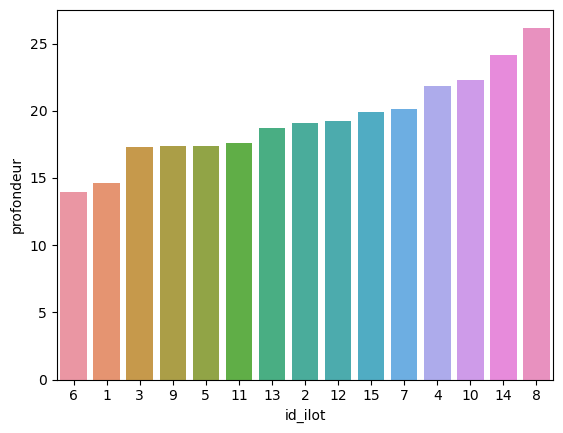

In [257]:
plt.figure()
profondeur_ilot_ns = parcelles.groupby(['id_ilot'])['profondeur'].mean()
profondeur_ilot = parcelles.groupby(['id_ilot'])['profondeur'].mean().sort_values()
sns.barplot(x=profondeur_ilot.keys(),y=profondeur_ilot, order=profondeur_ilot.keys())
plt.show()

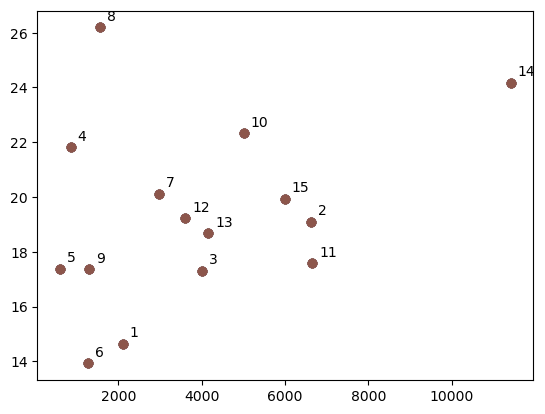

In [258]:
fig, ax = plt.subplots()
profondeur = list(profondeur_ilot_ns)
ax.scatter(surfaces_liste, profondeur)

for i, txt in enumerate(ilots):
    ax.annotate(txt, (surfaces_liste[i], profondeur[i]), xytext=(5,5), textcoords='offset points')
    plt.scatter(surfaces_liste, profondeur)

plt.show()

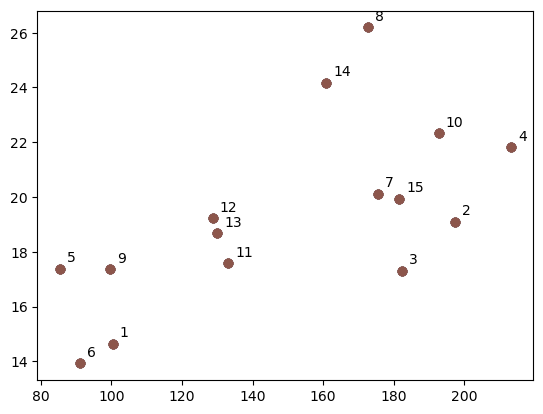

In [259]:
fig, ax = plt.subplots()
ax.scatter(moyenne_liste, profondeur)

for i, txt in enumerate(ilots):
    ax.annotate(txt, (moyenne_liste[i], profondeur[i]), xytext=(5,5), textcoords='offset points')
    plt.scatter(moyenne_liste, profondeur)

plt.show()

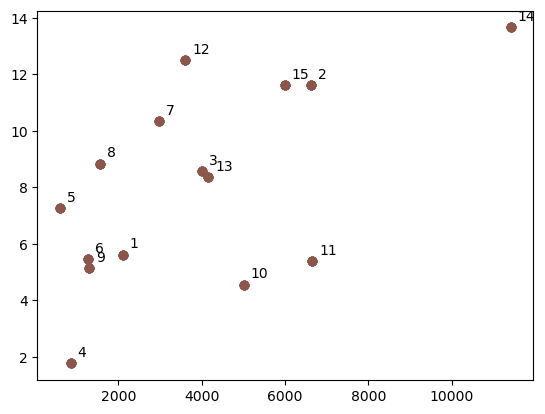

In [147]:
fig, ax = plt.subplots()
pr_std = parcelles.groupby(['id_ilot'])['profondeur'].std()
profondeur_ecart = list(pr_std)
ax.scatter(surfaces_liste, profondeur_ecart)

for i, txt in enumerate(ilots):
    ax.annotate(txt, (surfaces_liste[i], profondeur_ecart[i]), xytext=(5,5), textcoords='offset points')
    plt.scatter(surfaces_liste, profondeur_ecart)

plt.show()

écarts :  [5.61681299442003, 11.607408427821277, 8.566115056440298, 1.7676457742809597, 7.258225580086952, 5.454648119713142, 10.348581431273848, 8.830440652148178, 5.128952435901856, 4.546124159528219, 5.378263691632708, 12.493453349993574, 8.360819748501669, 13.658705991482893, 11.607157153644206]
moyenne :  [14.635714285714286, 19.094076923076923, 17.30727272727273, 21.80825, 17.383714285714287, 13.920428571428571, 20.111470588235292, 26.189888888888888, 17.364384615384616, 22.318923076923078, 17.5849, 19.21635714285714, 18.6831875, 24.170577464788735, 19.931242424242424]


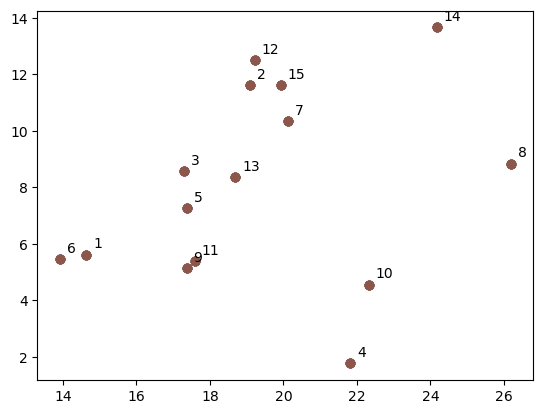

In [163]:
fig, ax = plt.subplots()
ax.scatter(profondeur, profondeur_ecart)

for i, txt in enumerate(ilots):
    ax.annotate(txt, (profondeur[i], profondeur_ecart[i]), xytext=(5,5), textcoords='offset points')
    plt.scatter(profondeur, profondeur_ecart)

print('écarts : ', profondeur_ecart)
print('moyenne : ', profondeur)
plt.show()

Concernant la profondeur du parcellaire par îlot, il semble y avoir une corrélation positive faible avec la surface de l'îlot. On voit toutefois un certain nombre d'îlots avoir une profondeur moyenne équivalente à surface très différente, donc une caractéristique plus pertinente semble être celle des écarts-type, ceux-ci augmentant selon plusieurs tendances avec la surface.

#### Rectangularité des parcelles

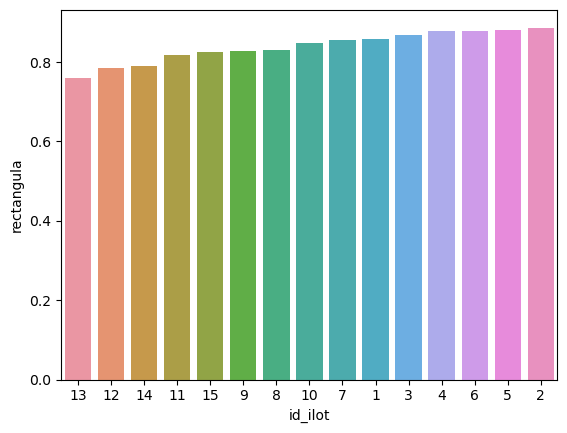

In [139]:
plt.figure()
rect_ilot_ns = parcelles.groupby(['id_ilot'])['rectangula'].mean()
rect_ilot = parcelles.groupby(['id_ilot'])['rectangula'].mean().sort_values()
sns.barplot(x=rect_ilot.keys(),y=rect_ilot, order=rect_ilot.keys())
plt.show()

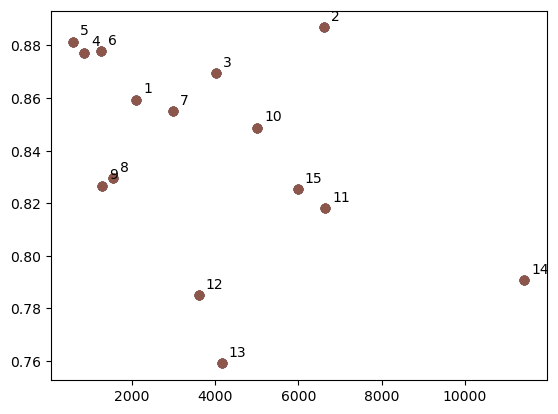

In [140]:
fig, ax = plt.subplots()
rectangularite_il = list(rect_ilot_ns)
ax.scatter(surfaces_liste, rectangularite_il)

for i, txt in enumerate(ilots):
    ax.annotate(txt, (surfaces_liste[i], rectangularite_il[i]), xytext=(5,5), textcoords='offset points')
    plt.scatter(surfaces_liste, rectangularite_il)

plt.show()

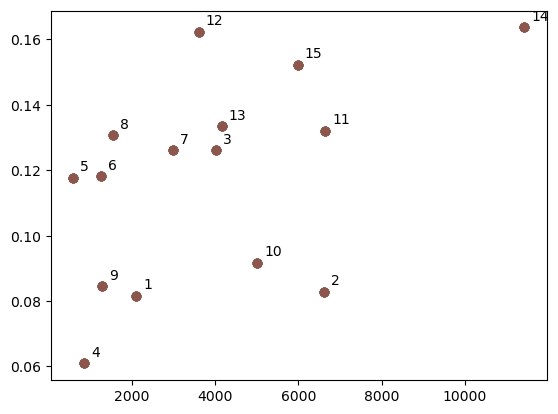

In [141]:
fig, ax = plt.subplots()
rect_ilot_std = parcelles.groupby(['id_ilot'])['rectangula'].std()
rectangularite_ecart = list(rect_ilot_std)
ax.scatter(surfaces_liste, rectangularite_ecart)

for i, txt in enumerate(ilots):
    ax.annotate(txt, (surfaces_liste[i], rectangularite_ecart[i]), xytext=(5,5), textcoords='offset points')
    plt.scatter(surfaces_liste, rectangularite_ecart)

plt.show()

écarts :  [0.08166353735501136, 0.0828038305815278, 0.12609012100366396, 0.06088992801221997, 0.11765324353491372, 0.1181783900217458, 0.12613755913101146, 0.13068197189275108, 0.08447720068691573, 0.09170769617900965, 0.1320534585626872, 0.1623393793078995, 0.13348900144979928, 0.16365552599018077, 0.1523281694635671]
moyenne :  [0.8593333333333333, 0.8868461538461538, 0.8693636363636364, 0.8772500000000001, 0.8814285714285715, 0.8778571428571428, 0.8549411764705883, 0.8295555555555556, 0.8266923076923077, 0.8486923076923076, 0.81808, 0.785, 0.75909375, 0.7906901408450705, 0.8253939393939393]


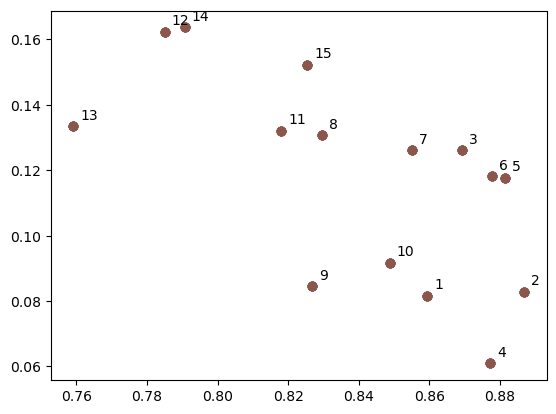

In [165]:
fig, ax = plt.subplots()
rect_ilot_std = parcelles.groupby(['id_ilot'])['rectangula'].std()
rectangularite_ecart = list(rect_ilot_std)
ax.scatter(rectangularite_il, rectangularite_ecart)

for i, txt in enumerate(ilots):
    ax.annotate(txt, (rectangularite_il[i], rectangularite_ecart[i]), xytext=(5,5), textcoords='offset points')
    plt.scatter(rectangularite_il, rectangularite_ecart)

print('écarts : ', rectangularite_ecart)
print('moyenne : ', rectangularite_il)
plt.show()

On remarque que la régularité des îlots est aussi marquée par une forte différence Nord-Sud au niveau de la rue Galande, qui sépare des îlots moins régulier des autre. Les îlots bordant la rive Est de la place Maubert marquent aussi cette tendance

#### Elongation des parcelles

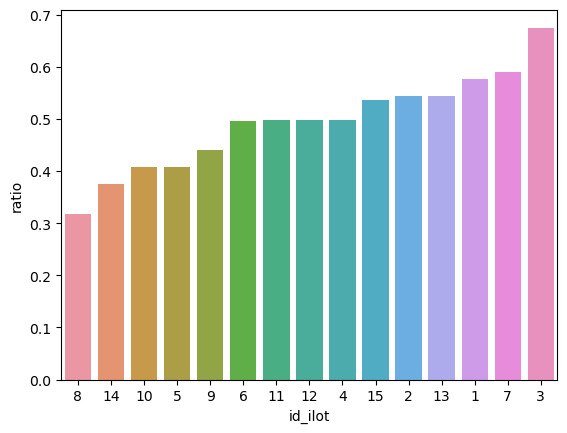

In [150]:
plt.figure()
ratio_ilot_ns = parcelles.groupby(['id_ilot'])['ratio'].mean()
ratio_ilot = parcelles.groupby(['id_ilot'])['ratio'].mean().sort_values()
sns.barplot(x=ratio_ilot.keys(),y=ratio_ilot, order=ratio_ilot.keys())
plt.show()

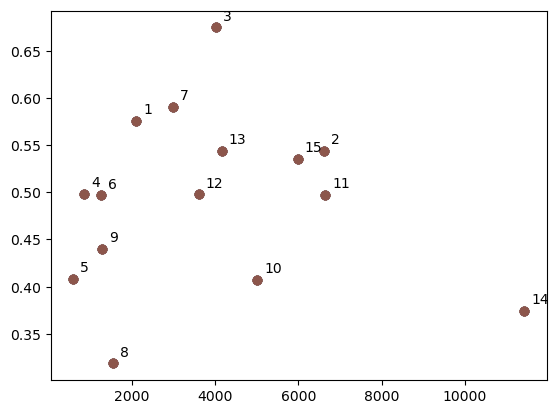

In [151]:
fig, ax = plt.subplots()
ratios_il = list(ratio_ilot_ns)
ax.scatter(surfaces_liste, ratios_il)

for i, txt in enumerate(ilots):
    ax.annotate(txt, (surfaces_liste[i], ratios_il[i]), xytext=(5,5), textcoords='offset points')
    plt.scatter(surfaces_liste, ratios_il)

plt.show()

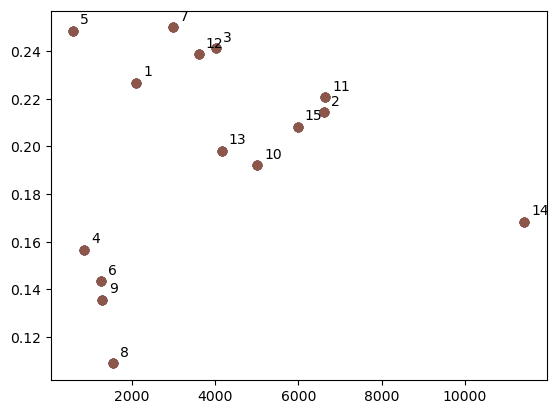

In [167]:
fig, ax = plt.subplots()
ratios_ilot_std = parcelles.groupby(['id_ilot'])['ratio'].std()
ratios_ecart = list(ratios_ilot_std)
ax.scatter(surfaces_liste, ratios_ecart)

for i, txt in enumerate(ilots):
    ax.annotate(txt, (surfaces_liste[i], ratios_ecart[i]), xytext=(5,5), textcoords='offset points')
    plt.scatter(surfaces_liste, ratios_ecart)

plt.show()

In [168]:
print('écarts : ', ratios_ecart)
print('moyenne : ', ratios_il)

écarts :  [0.22661567003356567, 0.21423357729596368, 0.24106657394502684, 0.1567256094793275, 0.2484903945638064, 0.14343287283948897, 0.24980616014633988, 0.10899541274750969, 0.13563525749937985, 0.19206417196824127, 0.22052103791535468, 0.23861674513369985, 0.19819365478840917, 0.1683529396049913, 0.20820197980312147]
moyenne :  [0.5758095238095239, 0.5442307692307693, 0.6750454545454545, 0.49875, 0.4081428571428572, 0.4967142857142857, 0.5906470588235294, 0.31833333333333336, 0.4403846153846154, 0.4073846153846154, 0.49768, 0.4981071428571428, 0.54428125, 0.3741267605633803, 0.5357575757575758]


# Etude par rue

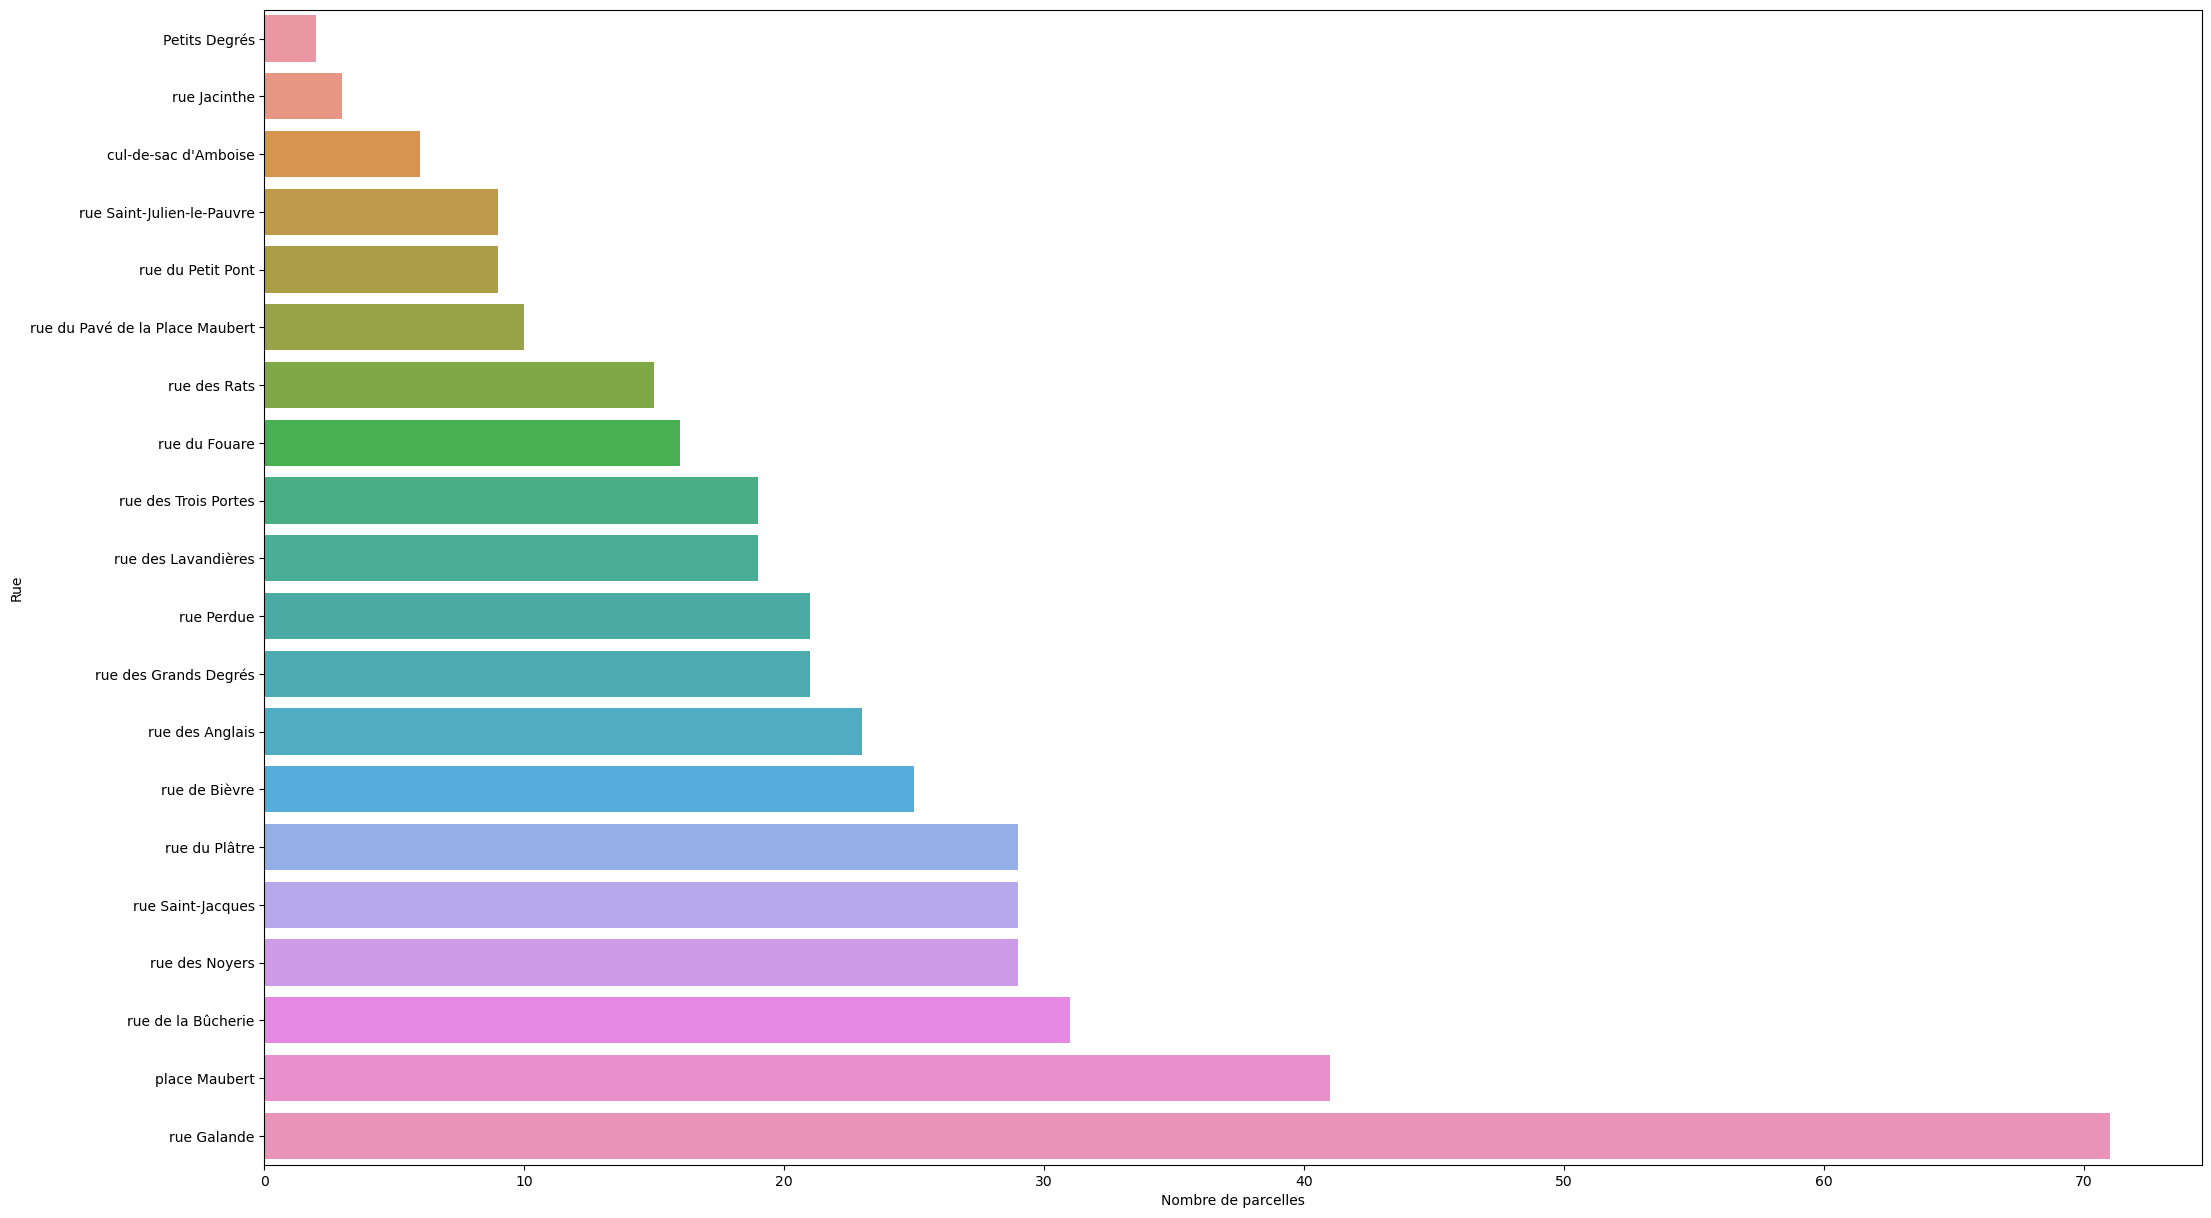

In [268]:
plt.figure(figsize = (25,15))
nb_parcelles_rue = lineaire.groupby('etiquette')['id'].count().sort_values()
sns.barplot(y=nb_parcelles_rue.keys(),x=nb_parcelles_rue, order=nb_parcelles_rue.keys())
plt.ylabel("Rue")
plt.xlabel("Nombre de parcelles")
plt.show()

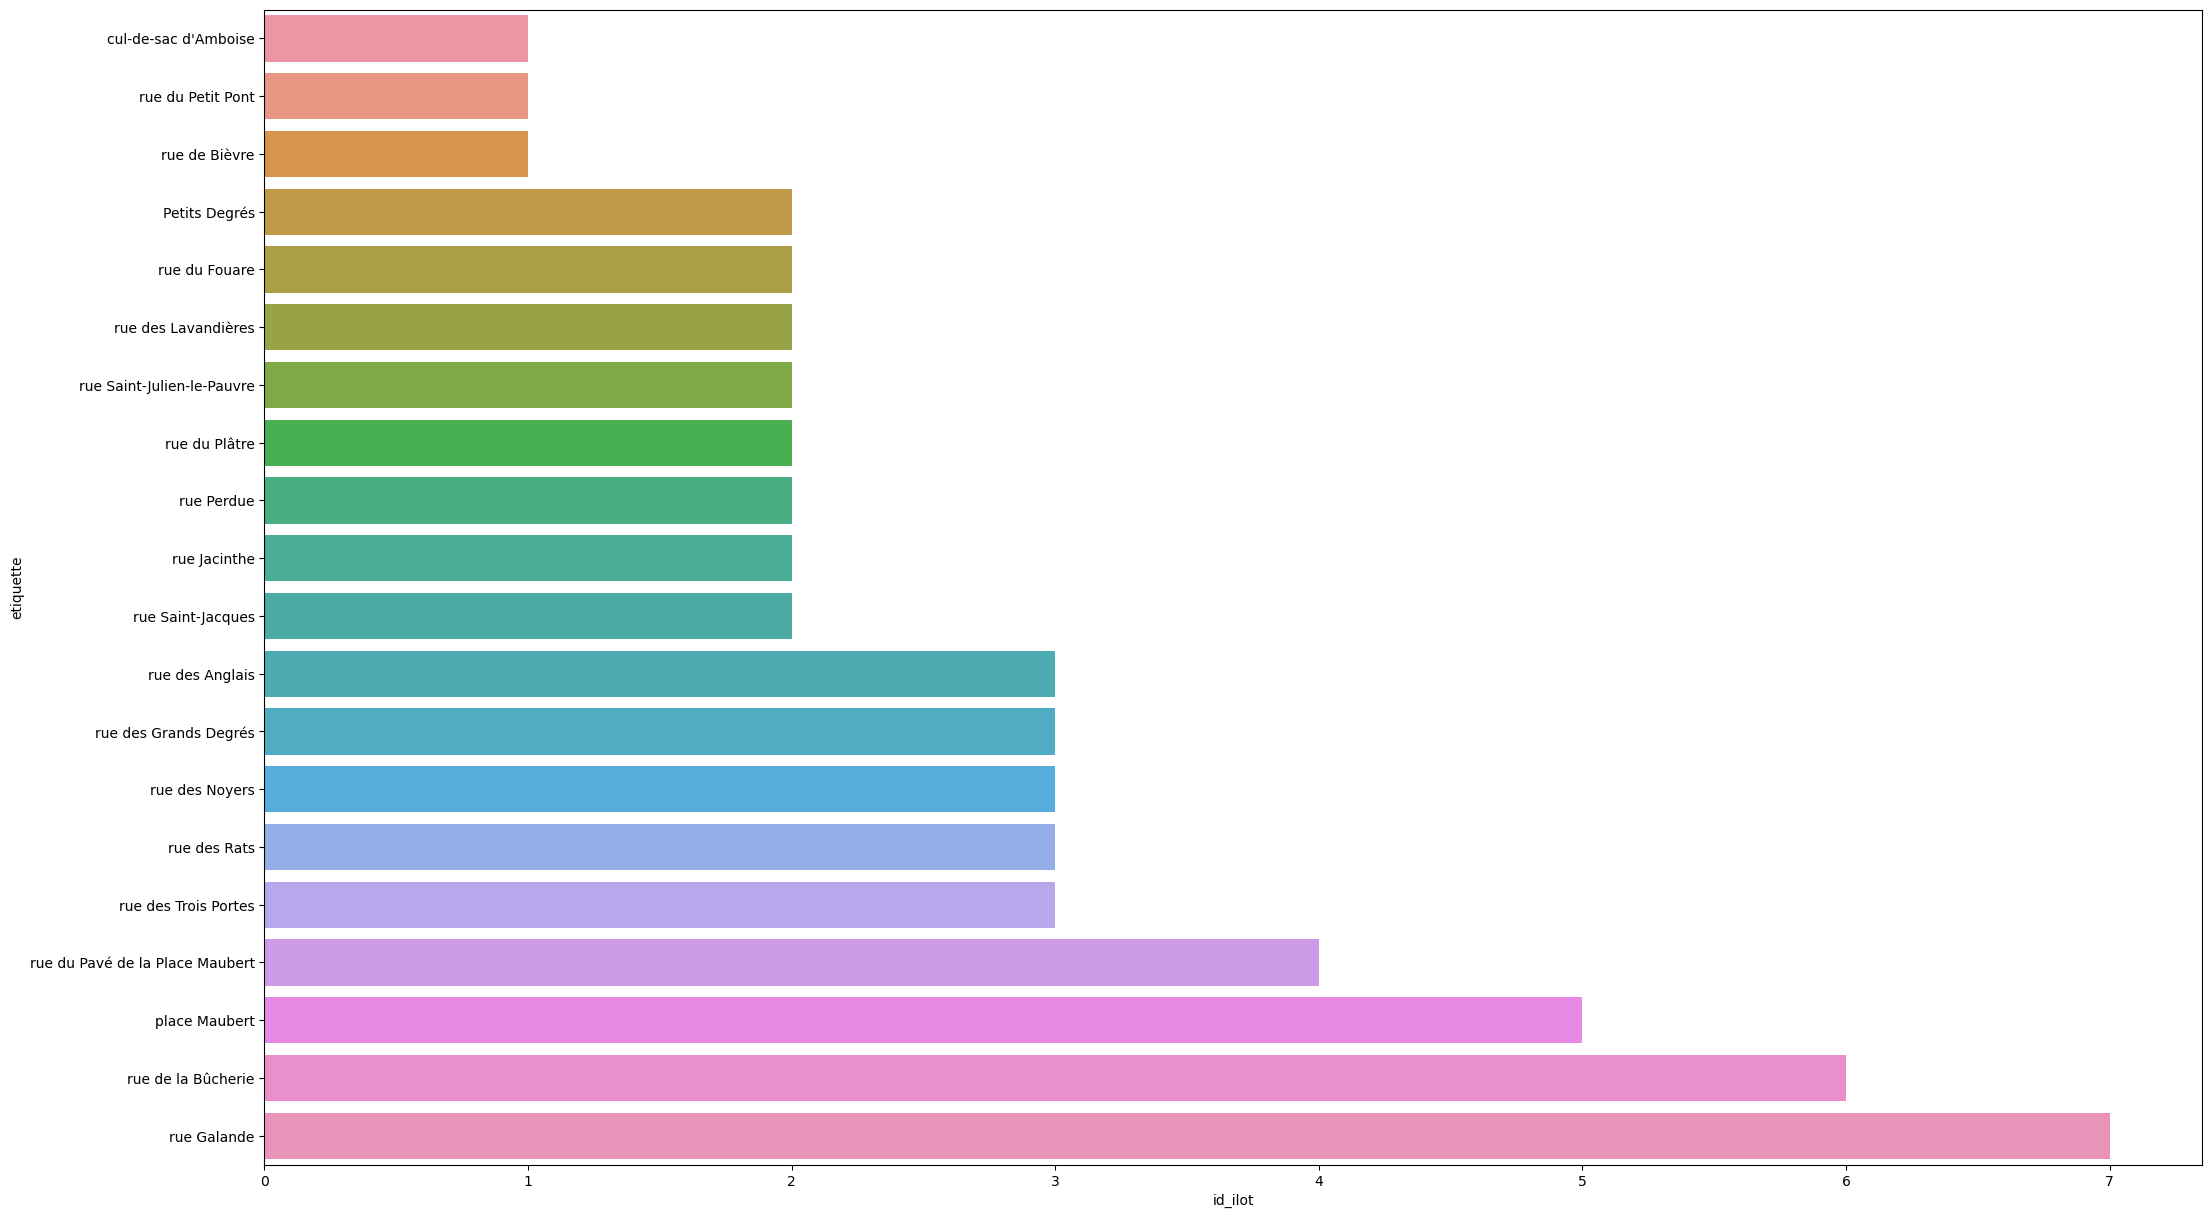

In [202]:
plt.figure(figsize = (25,15))
nb_ilots_rue = lineaire.groupby('etiquette')['id_ilot'].nunique().sort_values()
sns.barplot(y=nb_ilots_rue.keys(),x=nb_ilots_rue, order=nb_ilots_rue.keys())
plt.show()

In [264]:
nb_parcelles_rue

etiquette
Petits Degrés                       2
rue Jacinthe                        3
cul-de-sac d'Amboise                6
rue Saint-Julien-le-Pauvre          9
rue du Petit Pont                   9
rue du Pavé de la Place Maubert    10
rue des Rats                       15
rue du Fouare                      16
rue des Trois Portes               19
rue des Lavandières                19
rue Perdue                         21
rue des Grands Degrés              21
rue des Anglais                    23
rue de Bièvre                      25
rue du Plâtre                      29
rue Saint-Jacques                  29
rue des Noyers                     29
rue de la Bûcherie                 31
place Maubert                      41
rue Galande                        71
Name: id, dtype: int64

On remarque d'entrée de jeu que la rue Galande représente un axe majeur du quartier, comme on pouvait s'en douter, avec le plus grand nombre d'îlots et de parcelles bordées, suivie de la place Maubert et de la rue de la Bûcherie. La rue Saint-Jacques, la rue de Bièvre et la rue des Noyers n'y figurent pas car on n'a qu'une seule de leurs rives représentées dans le SIG.

#### Parcelles perpendiculaires à la rue

In [204]:
ratios = {}

for rue in axes['etiquette'].unique():
    ratios[rue] = (axes[(axes['etiquette']==rue) & (axes['axe_rue']=='perpendiculaire à la rue')].count()/axes[axes['etiquette']==rue].count())['axe_rue']

sorted_ratios = sorted(ratios.items(), key=lambda x:x[1], reverse=True)
ratios = dict(sorted_ratios)

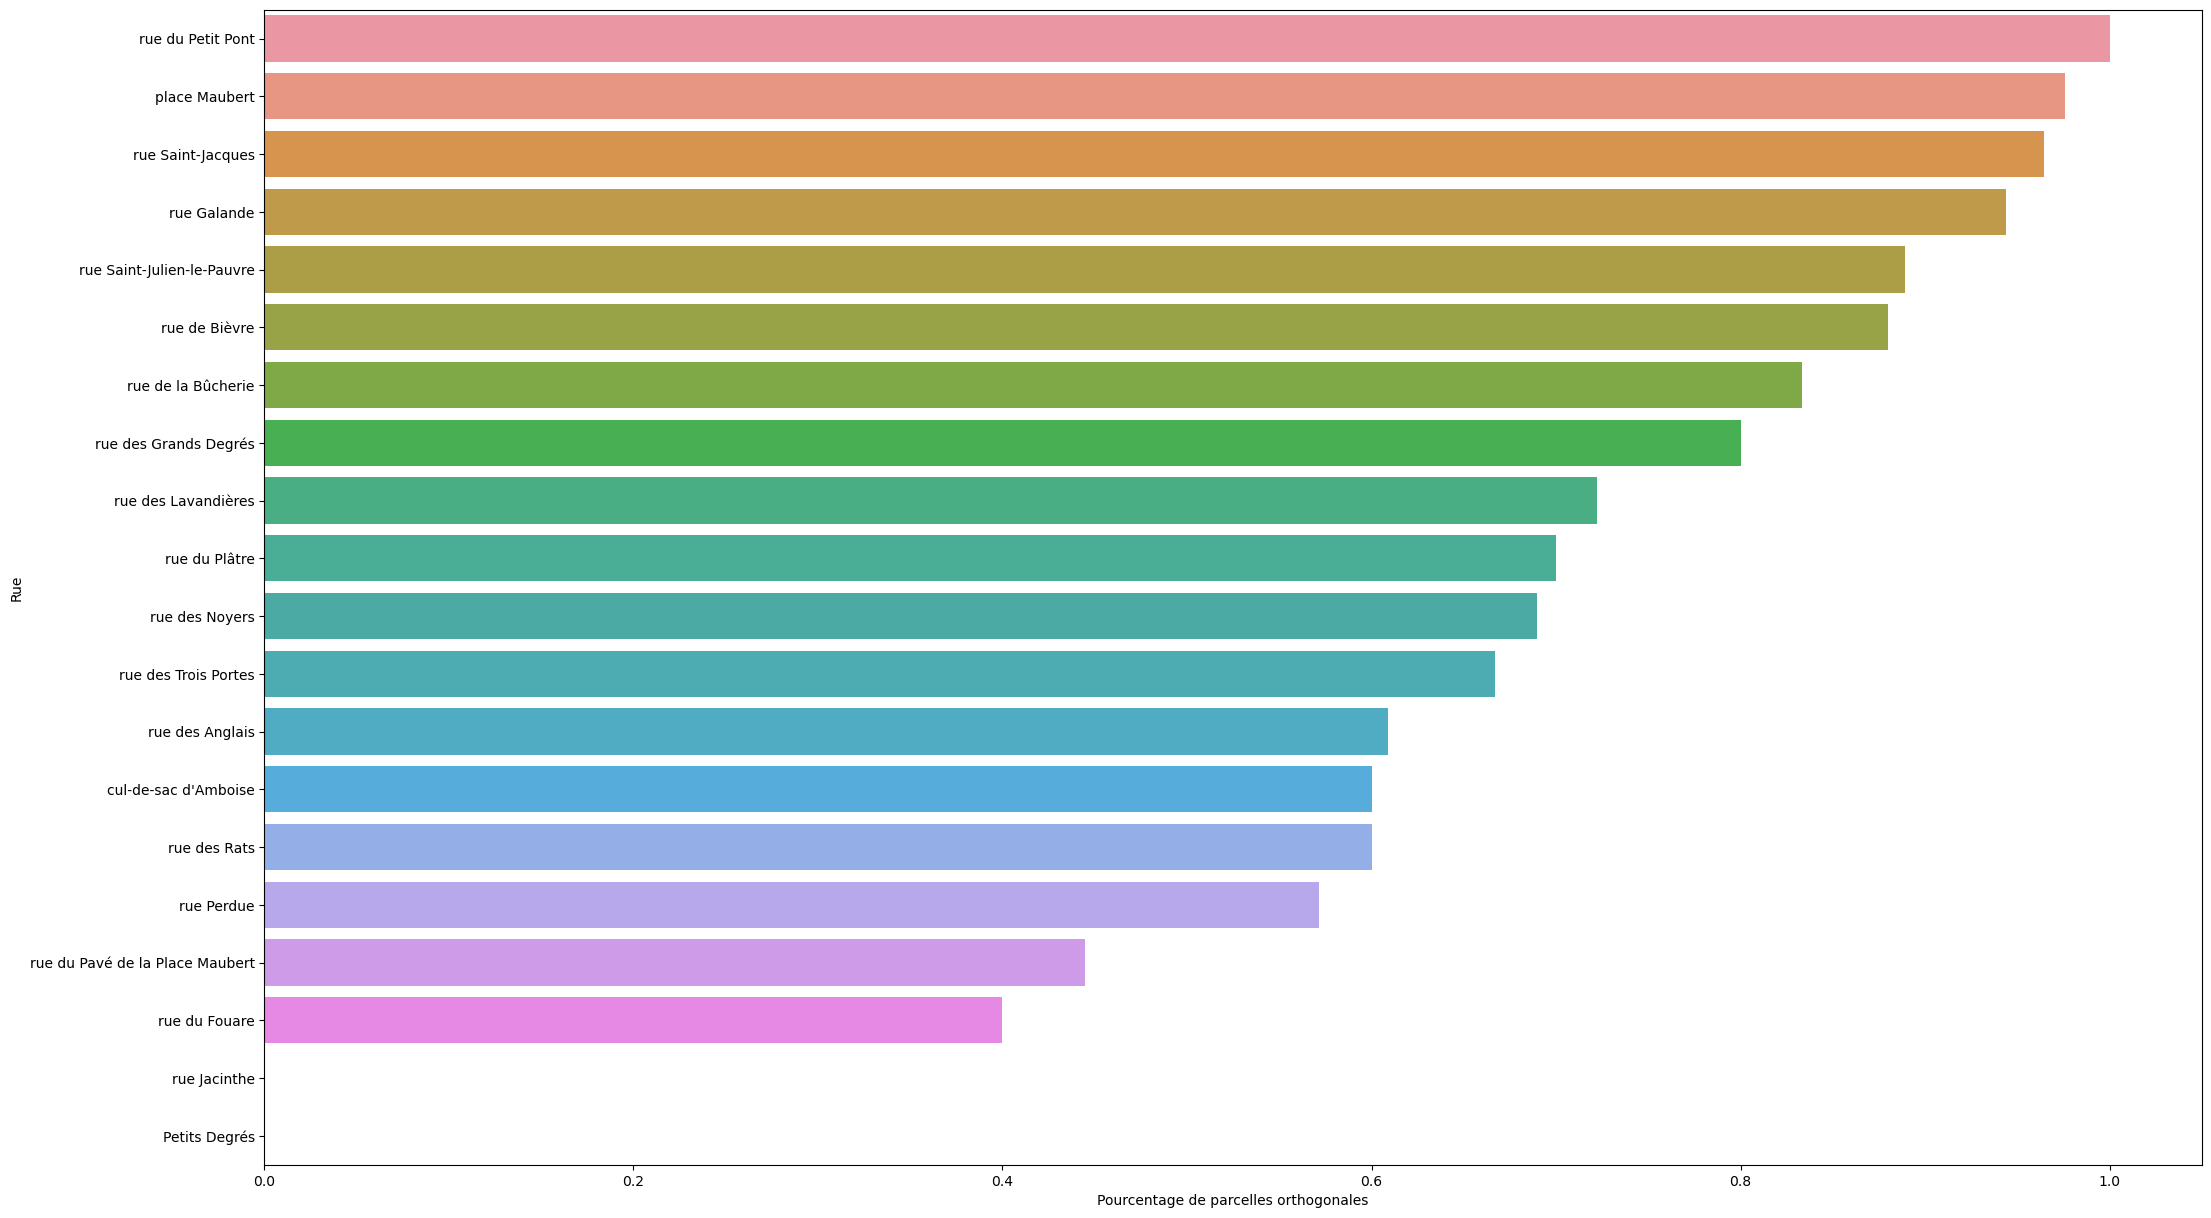

In [269]:
plt.figure(figsize = (25,15))
x=list(ratios.keys())
y=list(ratios.values())
sns.barplot(x=y, y=x)
plt.ylabel("Rue")
plt.xlabel("Pourcentage de parcelles orthogonales")
plt.show()

#### Axes principaux par rue

In [207]:
ratios_p = {}

for rue in axes['etiquette'].unique():
    ratios_p[rue] = (axes[(axes['etiquette']==rue) & (axes['axe']=='axe principal')].count()/axes[axes['etiquette']==rue].count())['axe_rue']

sorted_ratios = sorted(ratios_p.items(), key=lambda x:x[1], reverse=True)
ratios_p = dict(sorted_ratios)

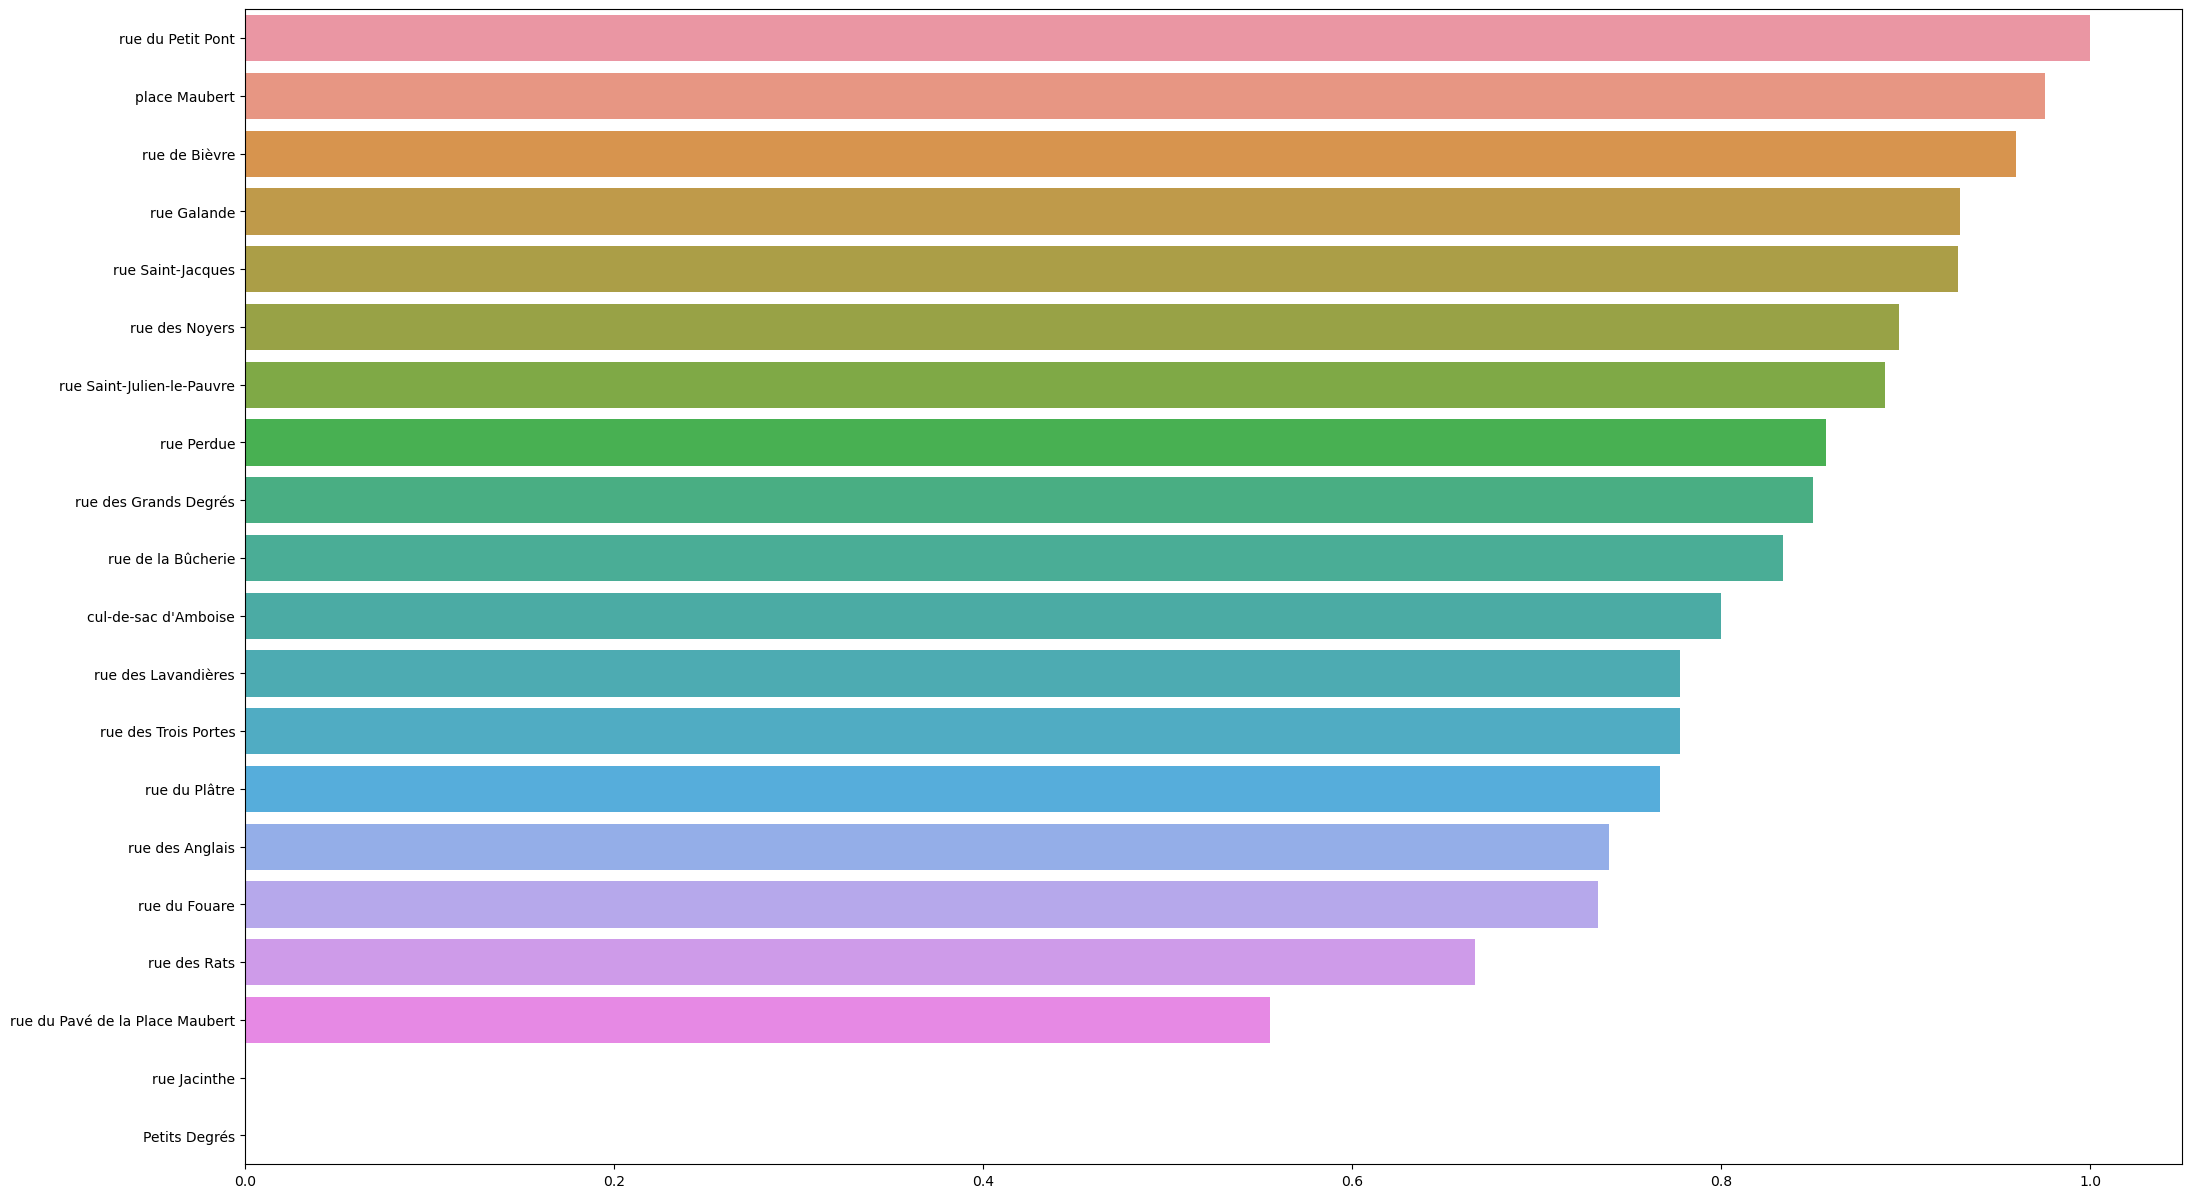

In [208]:
plt.figure(figsize = (25,15))
x=list(ratios_p.keys())
y=list(ratios_p.values())
sns.barplot(x=y, y=x)
plt.show()

On obtient ainsi deux classements différents des rues selon les parcelles qui les borde. Le critère de répartition le plus pertinent est sans doute celui de l'orientation des parcelles selon celle des rues, cette relation pouvant signaler la pression foncière régnant le long de celle-ci.

#### Longueur des façades

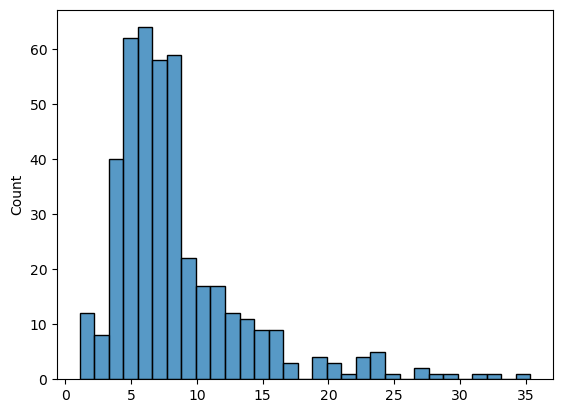

In [271]:
plt.figure()
longueur_facades = list(lineaire['length'])
sns.histplot(longueur_facades)
plt.show()

In [281]:
moys = {}

for rue in axes['etiquette'].unique():
    moys[rue] = lineaire[(lineaire['etiquette']==rue)]['length'].mean()

sorted_moys = sorted(moys.items(), key=lambda x:x[1], reverse=True)
moys = dict(sorted_moys)

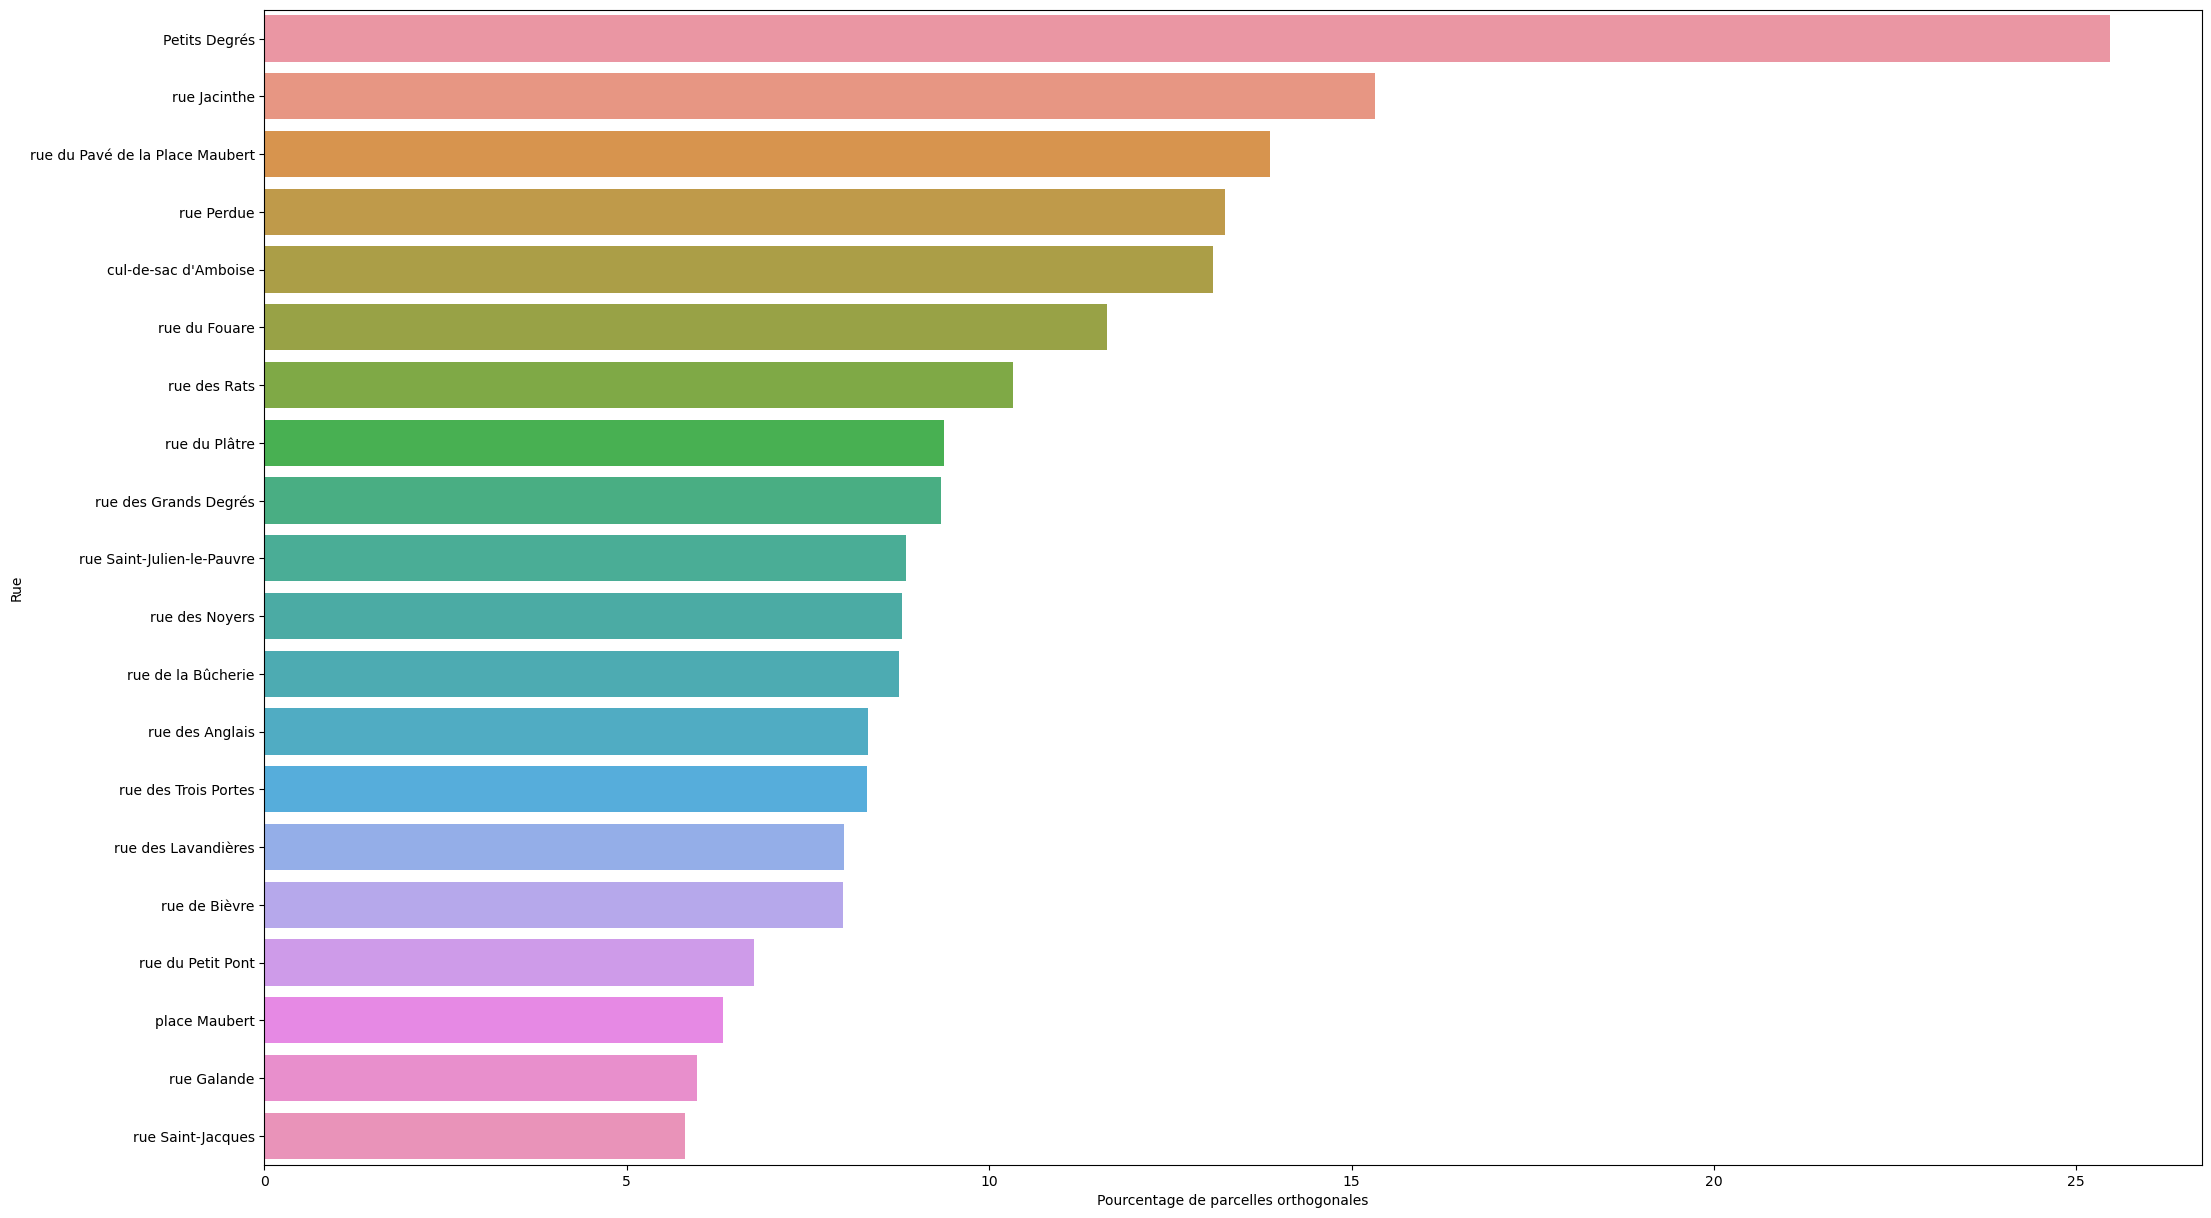

In [282]:
plt.figure(figsize = (25,15))
x=list(moys.keys())
y=list(moys.values())
sns.barplot(x=y, y=x)
plt.ylabel("Rue")
plt.xlabel("Linéaire de façade moyen")
plt.show()